In [1]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import numpy as np # Multi-dimensional arrays
from rasterio import plot
import sap
import higra as hg 

# Load and display LiDAR raster

The LiDAR raster files are located in the `data` folder. The rasters are in single band `TIFF` image format.

In [28]:
data_dir = Path('img_data/')
list(data_dir.glob('*.tif'))

[WindowsPath('img_data/dsm_vox_50cm_tile_-11_0.tif'),
 WindowsPath('img_data/dsm_vox_50cm_tile_-12_0.tif'),
 WindowsPath('img_data/dsm_vox_50cm_tile_-7_1.tif')]

## 1. Load and display a raster file

- Open the raster file and read the 2D array (tip: you can type `?function` to display docstrings, e.g. `?rio.open` )
- Read the 2D array
- Display the 2D array as an image
    + what can we do to visualize more details?

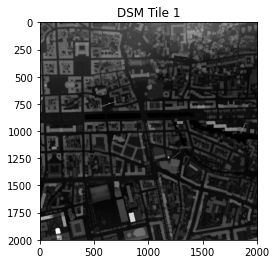

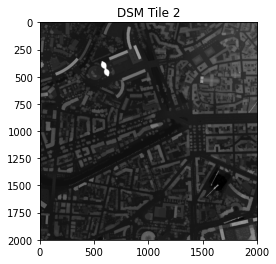

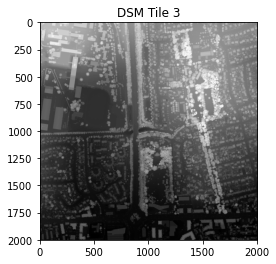

In [4]:
# Your turn!
# open raster file

# Load first file
image1 = rio.open('img_data/dsm_vox_50cm_tile_-11_0.tif')
dsm1 = image1.read(1)
plt.imshow(dsm1, cmap='gray')
plt.title('DSM Tile 1')
plt.show()

# Load second file
image2 = rio.open('img_data/dsm_vox_50cm_tile_-12_0.tif')
dsm2 = image2.read(1)
plt.imshow(dsm2, cmap='gray')
plt.title('DSM Tile 2')
plt.show()

# Load third file
image3 = rio.open('img_data/dsm_vox_50cm_tile_-7_1.tif')
dsm3 = image3.read(1)
plt.imshow(dsm3, cmap='gray')
plt.title('DSM Tile 3')
plt.show()



## 2. Visualize flat zones in the DSM

- Find the values of the flat zones
    + Sort the unique values in a list (or an array) of levels
- Display some flat zones
    + Display the flatzones of $i^{th}$ level

Text(0.5, 1.0, 'DSM 3: Ground and Non-ground Pixels')

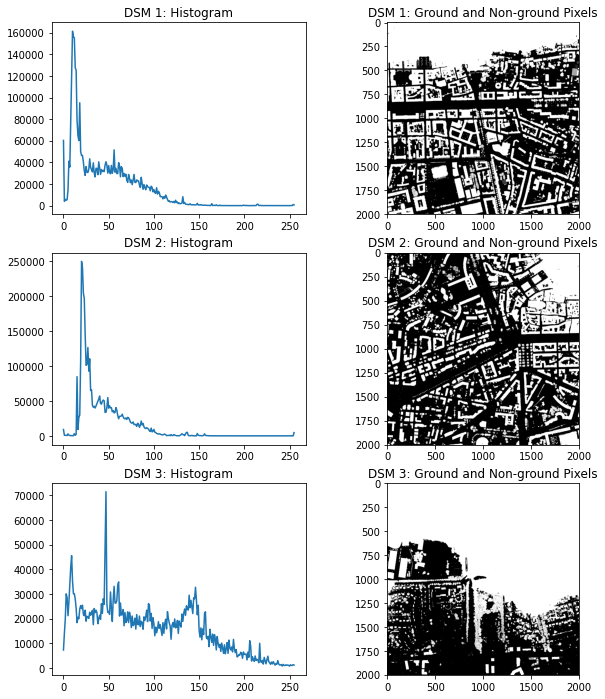

In [23]:
# sort the values in a list
unique_values1 = np.sort(np.unique(dsm1))
unique_values2 = np.sort(np.unique(dsm2))
unique_values3 = np.sort(np.unique(dsm3))

# find ground pixels
ground1 = np.where(dsm1 < 35, 0, 255)
ground2 = np.where(dsm2 < 35, 0, 255)
ground3 = np.where(dsm3 < 40, 0, 255)

# create image histogram
hist_1, bin_1 = np.histogram(dsm1, bins= 256)
hist_2, bin_2 = np.histogram(dsm2, bins= 256)
hist_3, bin_3 = np.histogram(dsm3, bins= 256)


# display 
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

axs[0, 0].plot(hist_1)
axs[0, 0].set_title("DSM 1: Histogram")

axs[0, 1].imshow(ground1, cmap = 'gray')
axs[0, 1].set_title("DSM 1: Ground and Non-ground Pixels")

axs[1, 0].plot(hist_2)
axs[1, 0].set_title("DSM 2: Histogram")

axs[1, 1].imshow(ground2, cmap = 'gray')
axs[1, 1].set_title("DSM 2: Ground and Non-ground Pixels")

axs[2, 0].plot(hist_3)
axs[2, 0].set_title("DSM 3: Histogram")

axs[2, 1].imshow(ground3, cmap = 'gray')
axs[2, 1].set_title("DSM 3: Ground and Non-ground Pixels")


## 3. Create a max-tree of the DSM

Building a max-tree from scratch is a challenging assignment 🙂

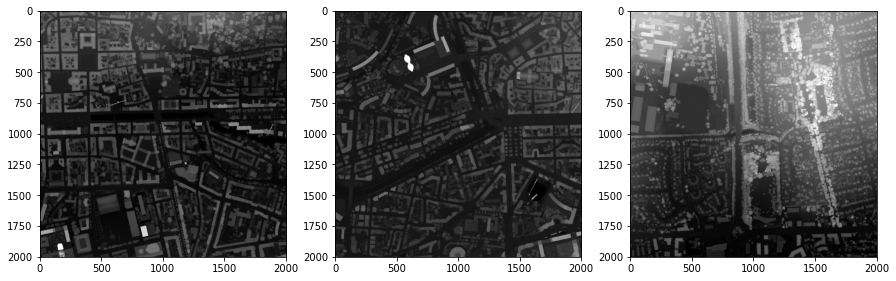

In [35]:
# If you have time, you can start work on a max-tree algorithm

# Extract the Max tree from each of the DSMs
# We compute the area attributes of the nodes, and reconstruct 
# a filtered image removing nodes with areas less than 100 pixels

fig, axs = plt.subplots(1, 3, figsize=(15, 12))

# DSM 1
t1 = sap.MaxTree(dsm1)
area1 = t1.get_attribute('area')
filtered_dsm1 = t1.reconstruct(area1 < 50)
axs[0].imshow(filtered_dsm1, cmap='gray')
#axs[0].title("DSM1: Max Tree with Threshold: Area < 100")

# DSM 2
t2 = sap.MaxTree(dsm2)
area2 = t2.get_attribute('area')
filtered_dsm2 = t2.reconstruct(area2 < 50)
axs[1].imshow(filtered_dsm2, cmap='gray')
#axs[1].title("DSM2: Max Tree with threshold: Area < 100")

# DSM 3
t3 = sap.MaxTree(dsm3)
area3 = t3.get_attribute('area')
filtered_dsm3 = t3.reconstruct(area3 < 50)
axs[2].imshow(filtered_dsm3, cmap='gray')
#axs[2].title("DSM3: Max Tree with threshold: Area < 100")

In [36]:
t1

MaxTree{'adjacency': 4,
 'image.dtype': dtype('float64'),
 'image.shape': (2001, 2001),
 'image_hash': '6ebb69b8',
 'image_name': None,
 'num_nodes': 6144186}

In [37]:
t2

MaxTree{'adjacency': 4,
 'image.dtype': dtype('float64'),
 'image.shape': (2001, 2001),
 'image_hash': 'f0eb33b2',
 'image_name': None,
 'num_nodes': 6119633}

In [38]:
t3

MaxTree{'adjacency': 4,
 'image.dtype': dtype('float64'),
 'image.shape': (2001, 2001),
 'image_hash': '1083e574',
 'image_name': None,
 'num_nodes': 5914463}